<a href="https://colab.research.google.com/github/Das152001/DSprojects/blob/main/UnitedAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
calls =pd.read_csv('/content/callsf0d4f5a.csv')
test = pd.read_csv('/content/testbc7185d.csv')
reasons = pd.read_csv('/content/reason18315ff.csv')
customer = pd.read_csv('/content/customers2afd6ea.csv')
sentiment_stats = pd.read_csv('/content/sentiment_statisticscc1e57a.csv')

In [3]:
sentiment_stats.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [4]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])

In [5]:
calls['handle_time'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()

In [6]:
calls['wait_time'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()

In [7]:
aht = (calls['handle_time'].mean())/60
ast = (calls['wait_time'].mean())/60
print(f'Average Handle Time (AHT): {aht} mins')
print(f'Average Speed to Answer (AST): {ast} mins')

Average Handle Time (AHT): 11.61747667455786 mins
Average Speed to Answer (AST): 7.284458988998747 mins


In [8]:
calls['hour_of_day'] = calls['call_start_datetime'].dt.hour

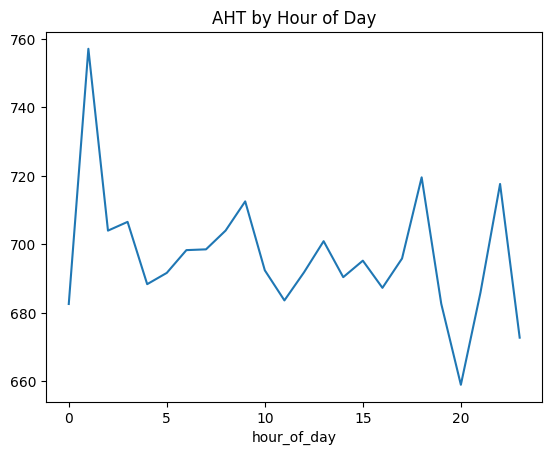

In [9]:
calls.groupby('hour_of_day')['handle_time'].mean().plot(kind='line')
plt.title('AHT by Hour of Day')
plt.show()

##**test day 2**

In [10]:

import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


from datetime import datetime


nltk.download('punkt')
nltk.download('stopwords')


sns.set(style='whitegrid')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:

calls =pd.read_csv('/content/callsf0d4f5a.csv')
test = pd.read_csv('/content/testbc7185d.csv')
reasons = pd.read_csv('/content/reason18315ff.csv')
customer = pd.read_csv('/content/customers2afd6ea.csv')
sentiment_stats = pd.read_csv('/content/sentiment_statisticscc1e57a.csv')




sentiment_stats.head()


,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [13]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [14]:
customer.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [15]:
reasons.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [16]:

calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], format='%m/%d/%Y %H:%M')
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], format='%m/%d/%Y %H:%M')


In [17]:

print(calls.isnull().sum())
print(customer.isnull().sum())
print(reasons.isnull().sum())
print(sentiment_stats.isnull().sum())


customer['elite_level_code'].fillna(0, inplace=True)


call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [18]:

merged_data = pd.merge(calls, customer, on='customer_id', how='left')
merged_data = pd.merge(merged_data, reasons, on='call_id', how='left')
merged_data = pd.merge(merged_data, sentiment_stats, on=['call_id', 'agent_id'], how='left')


In [19]:
merged_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,0.0,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,0.0,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35


In [20]:

merged_data['AHT'] = (merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']).dt.total_seconds() / 60
merged_data['AST'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds() / 60


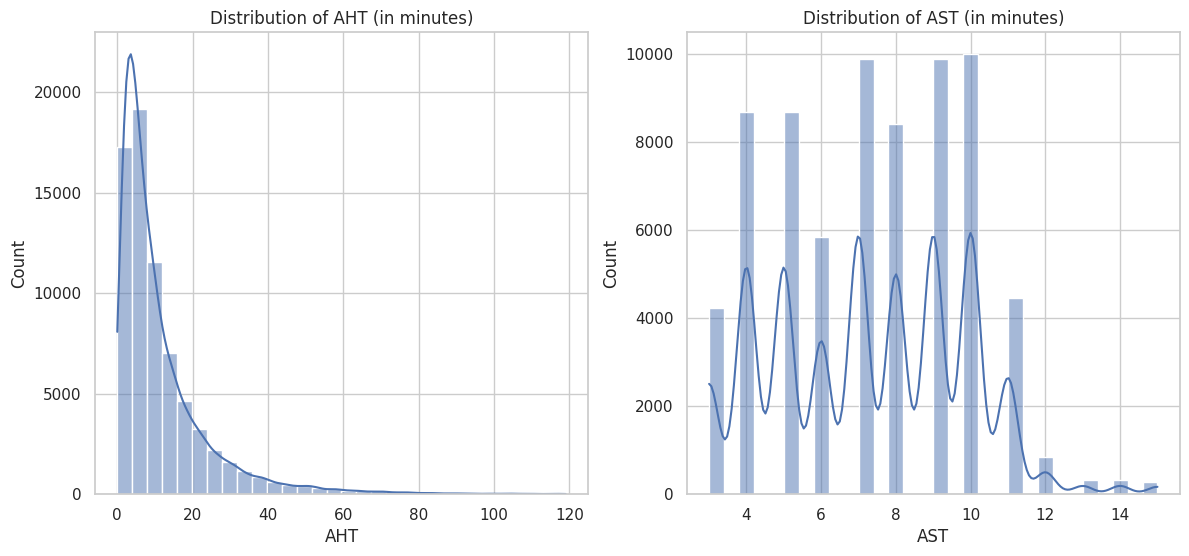

In [21]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(merged_data['AHT'], bins=30, ax=ax[0], kde=True).set_title('Distribution of AHT (in minutes)')
sns.histplot(merged_data['AST'], bins=30, ax=ax[1], kde=True).set_title('Distribution of AST (in minutes)')
plt.show()


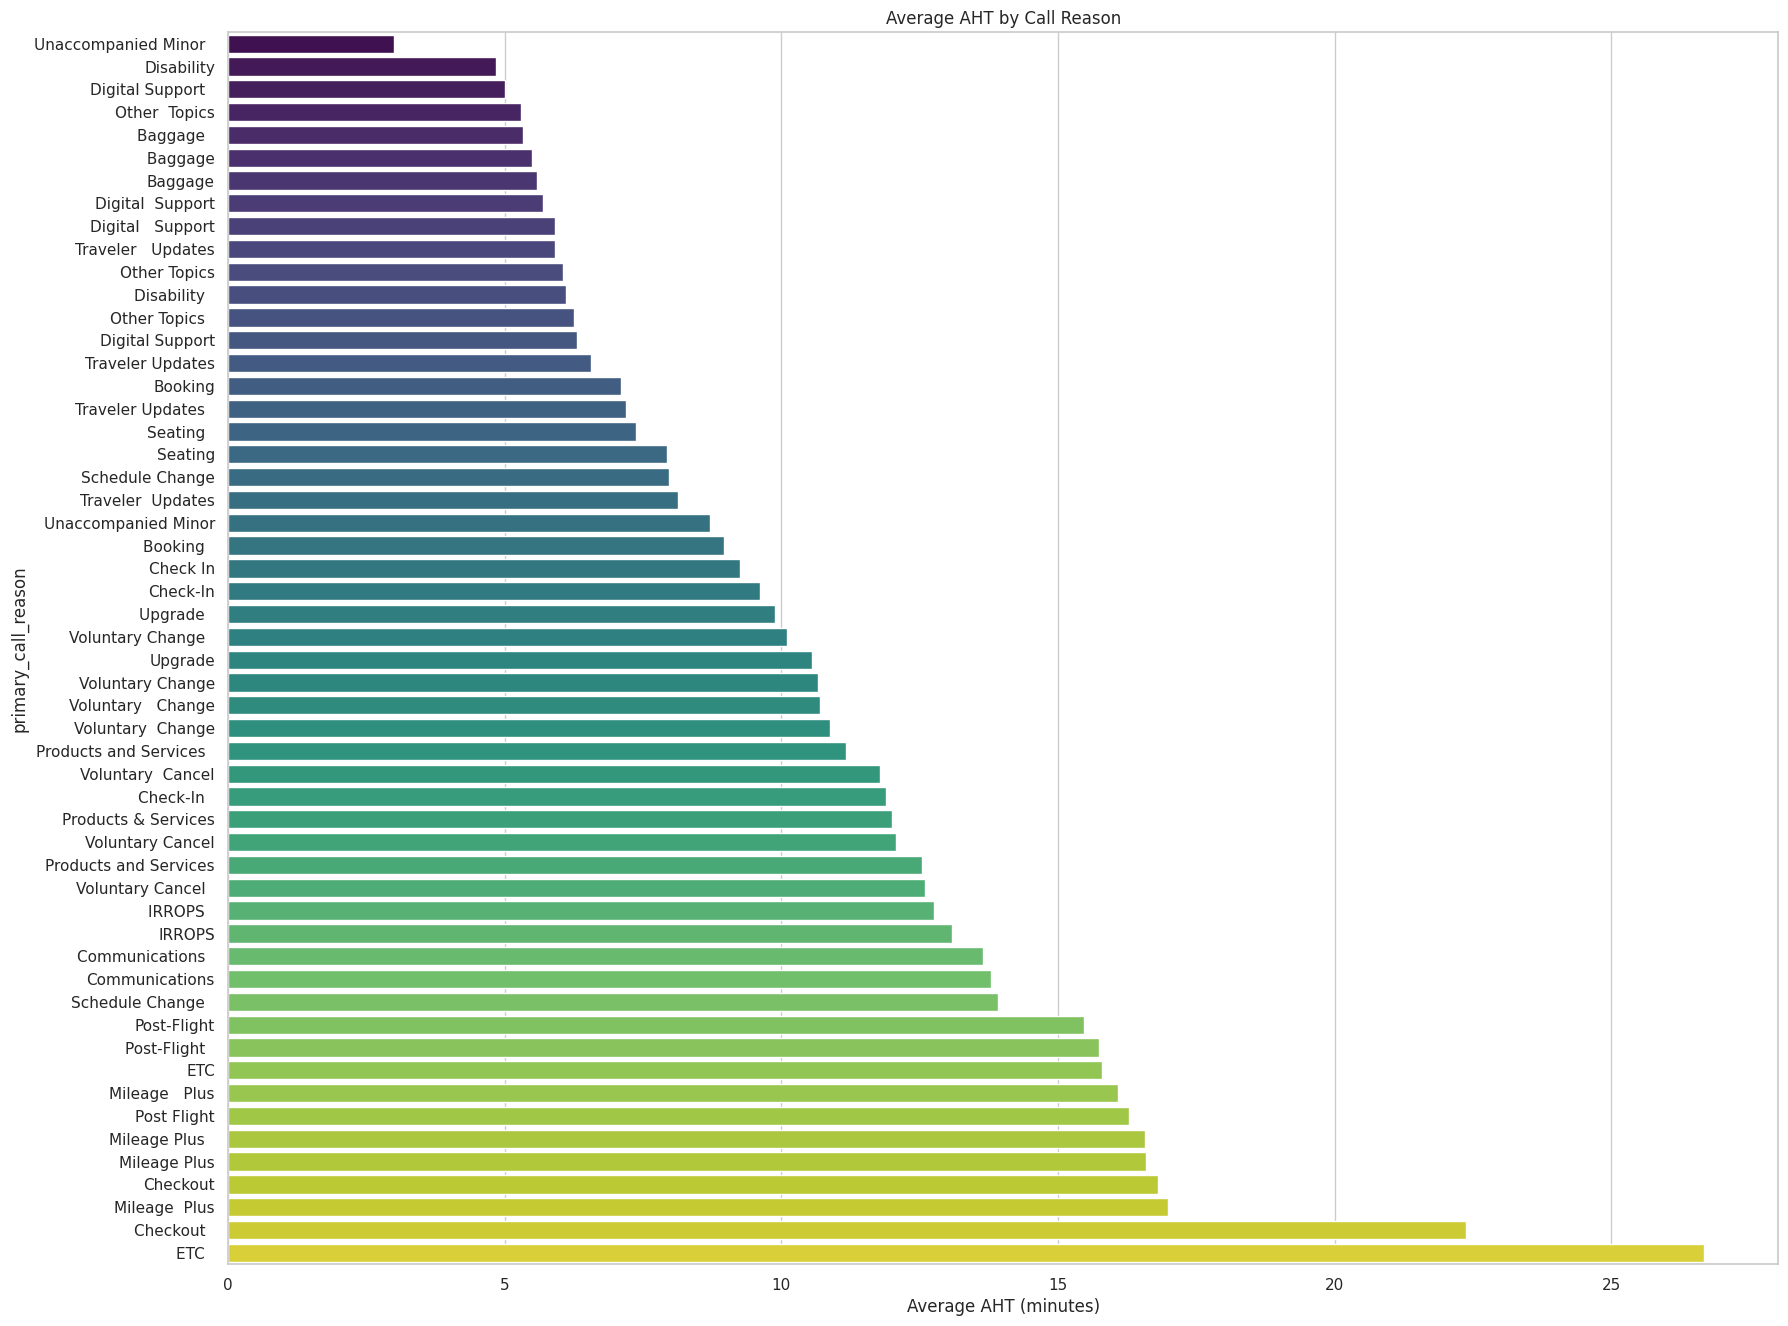

In [22]:

aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean().sort_values()
plt.figure(figsize=(20, 16))
sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
plt.xlabel('Average AHT (minutes)')
plt.title('Average AHT by Call Reason')
plt.show()


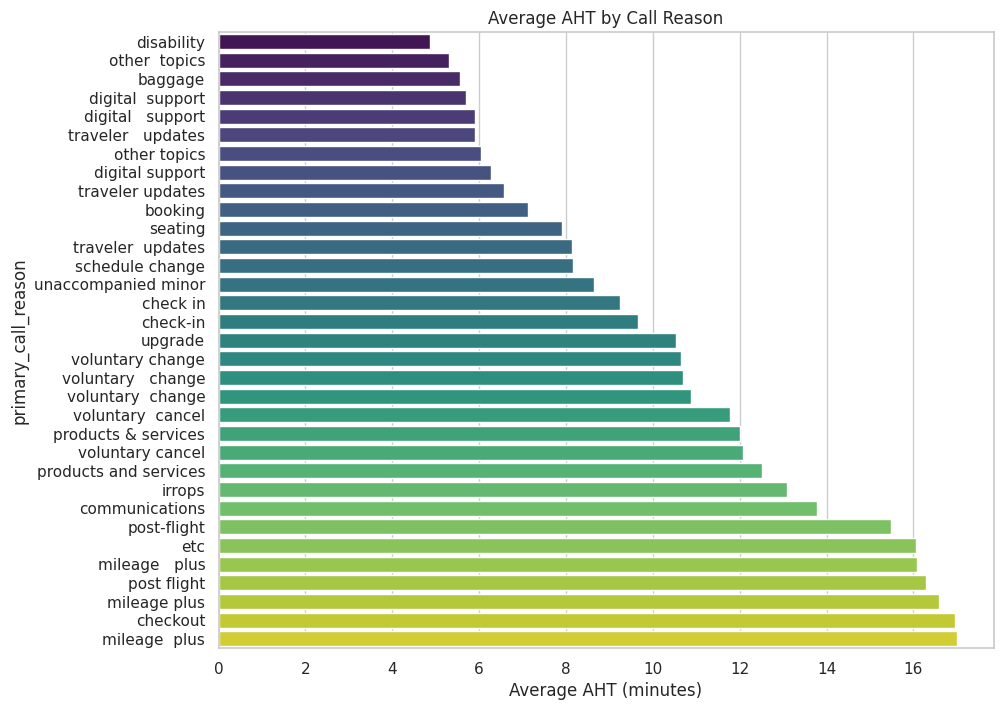

In [23]:

merged_data['primary_call_reason'] = merged_data['primary_call_reason'].str.strip().str.lower()


aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean().sort_values()


plt.figure(figsize=(10, 8))
sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
plt.xlabel('Average AHT (minutes)')
plt.title('Average AHT by Call Reason')
plt.show()


<ipython-input-28-224e48b0a956>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

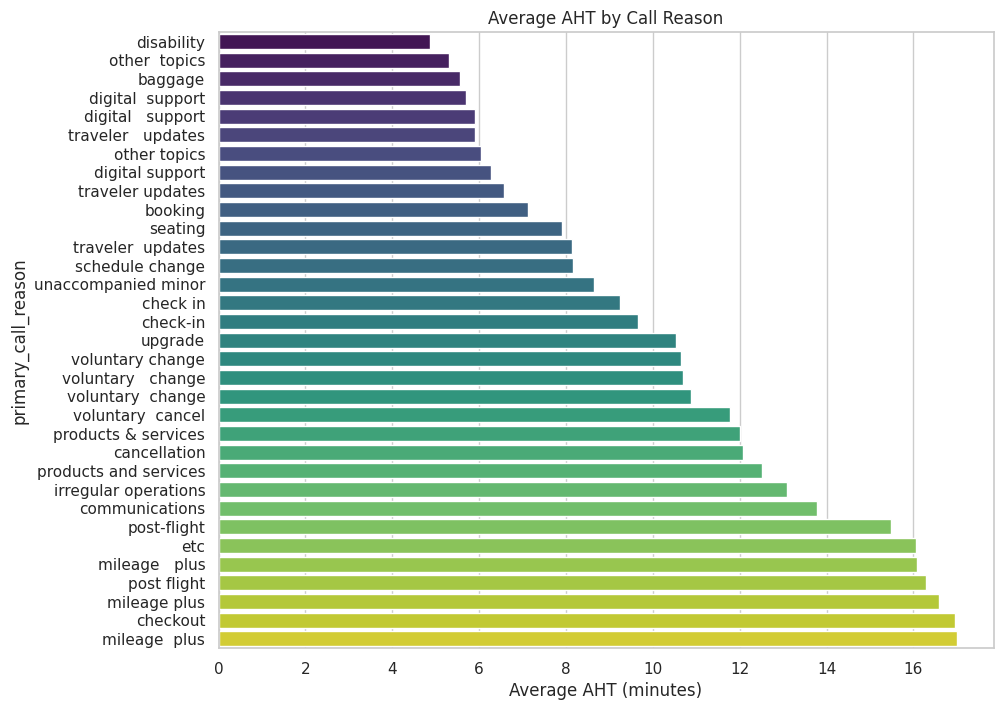

In [ ]:

reason_mapping = {
    'booking': 'booking',
    'book': 'booking',
    'voluntary cancel': 'cancellation',
    'cancel': 'cancellation',
    'upgrade': 'upgrade',
    'irrops': 'irregular operations',
    'irregular operations': 'irregular operations',
    'seating': 'seating',
    'seat': 'seating',
    'digital  support':'digital support'
}

# Clean the primary_call_reason column
merged_data['primary_call_reason'] = merged_data['primary_call_reason'].str.strip().str.lower()
merged_data['primary_call_reason'] = merged_data['primary_call_reason'].replace(reason_mapping)

# Group by the cleaned primary call reason and calculate the average AHT
aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean().sort_values()

# Plot the cleaned data
plt.figure(figsize=(10, 8))
sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
plt.xlabel('Average AHT (minutes)')
plt.title('Average AHT by Call Reason')
plt.show()


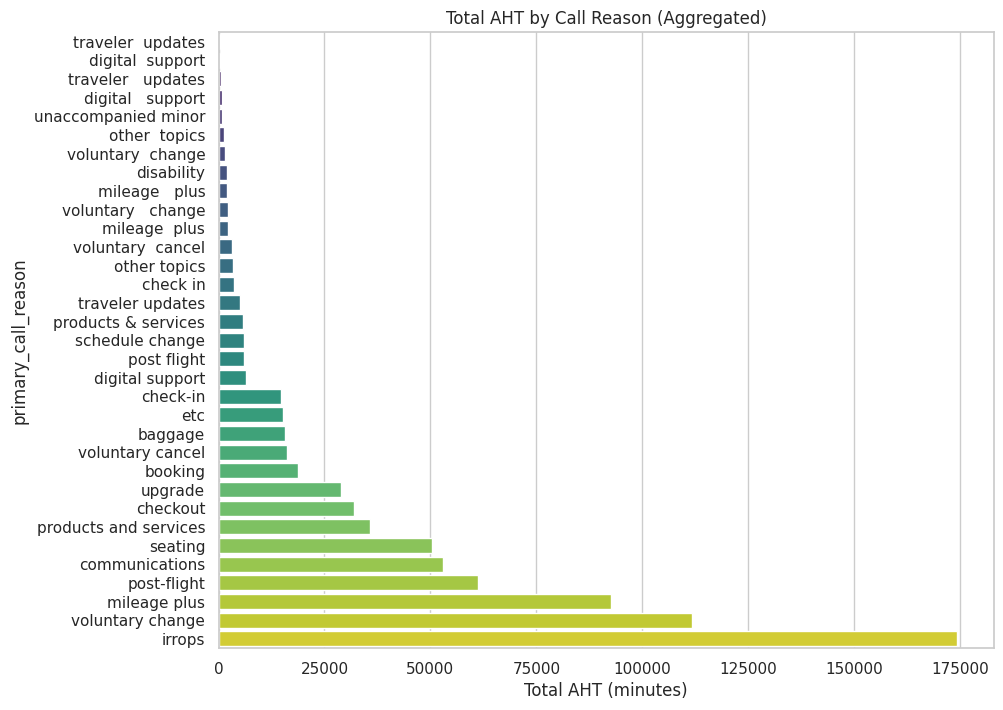

In [24]:

merged_data['primary_call_reason'] = merged_data['primary_call_reason'].str.strip().str.lower()


aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].sum().sort_values()


plt.figure(figsize=(10, 8))
sns.barplot(x=aht_by_reason.values, y=aht_by_reason.index, palette='viridis')
plt.xlabel('Total AHT (minutes)')
plt.title('Total AHT by Call Reason (Aggregated)')
plt.show()


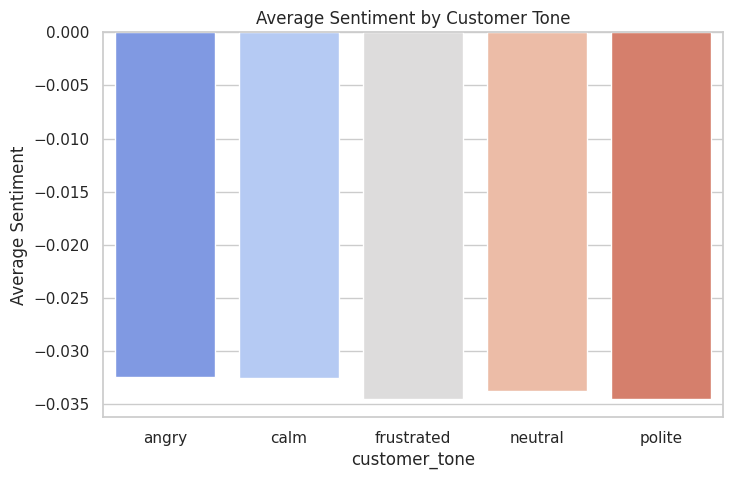

In [25]:

sentiment_by_tone = merged_data.groupby('customer_tone')['average_sentiment'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_by_tone.index, y=sentiment_by_tone.values, palette='coolwarm')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Customer Tone')
plt.show()


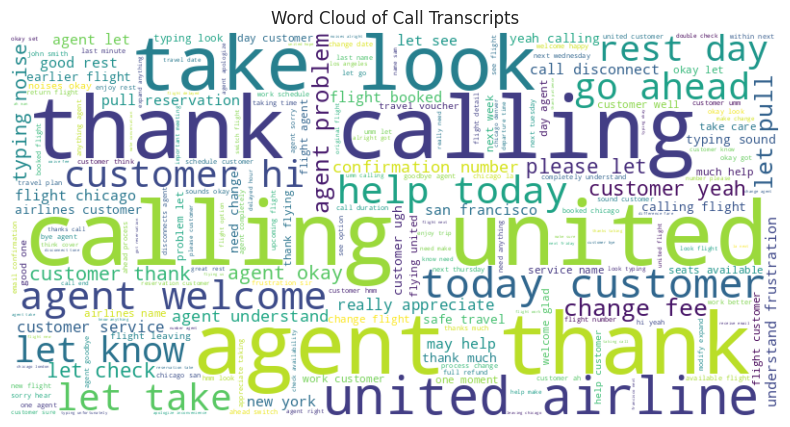

In [ ]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens


merged_data['cleaned_transcript'] = merged_data['call_transcript'].apply(clean_text)


all_words = [word for tokens in merged_data['cleaned_transcript'] for word in tokens]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Call Transcripts')
plt.show()


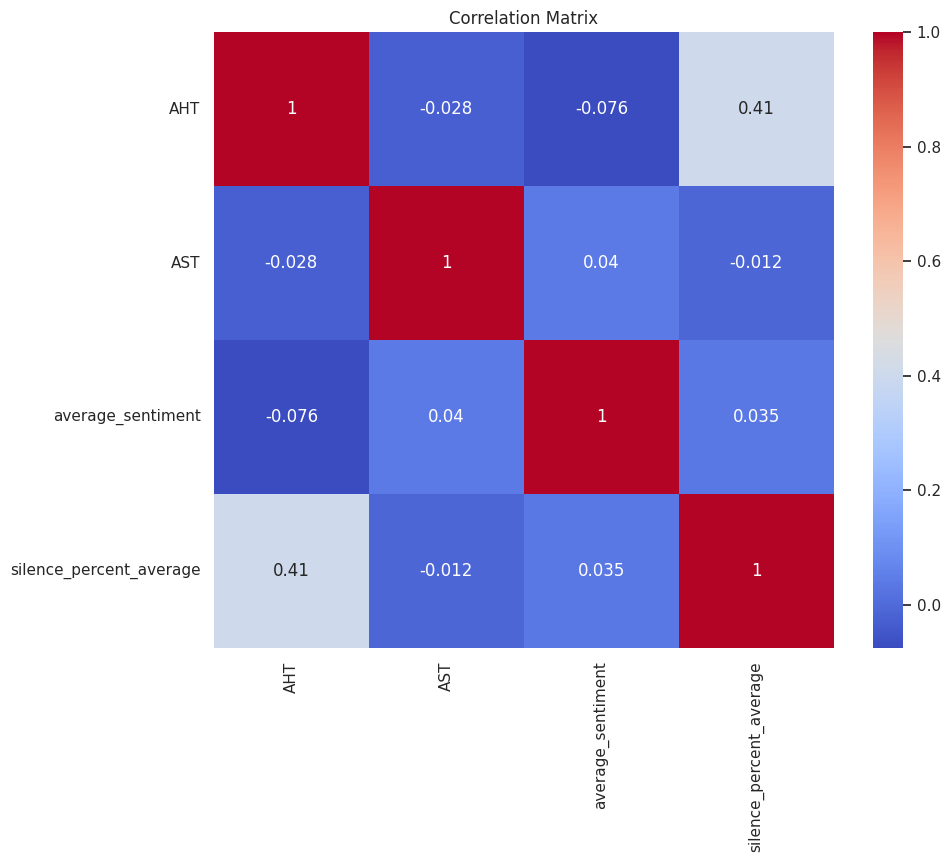

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[['AHT', 'AST', 'average_sentiment', 'silence_percent_average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


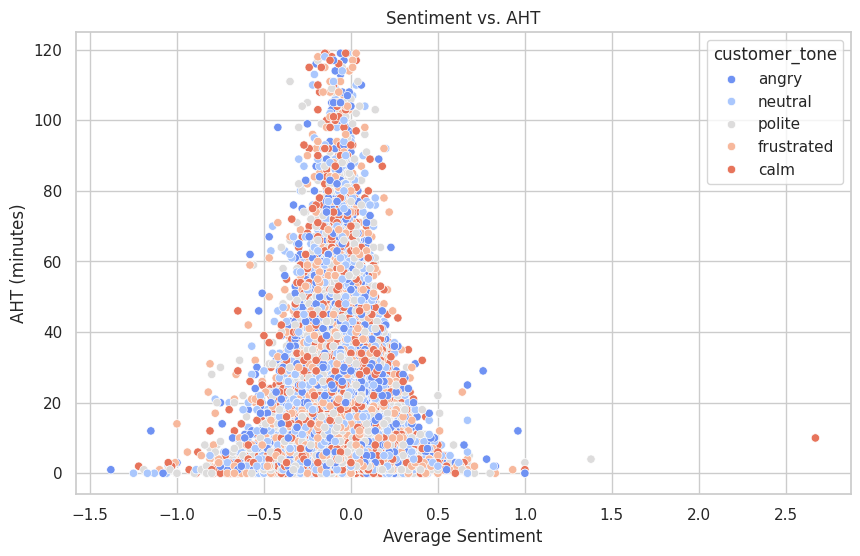

In [ ]:
# Visualize average sentiment vs. AHT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['average_sentiment'], y=merged_data['AHT'], hue=merged_data['customer_tone'], palette='coolwarm')
plt.xlabel('Average Sentiment')
plt.ylabel('AHT (minutes)')
plt.title('Sentiment vs. AHT')
plt.show()


In [ ]:

call_reason_counts = merged_data['primary_call_reason'].value_counts()


most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()


aht_most_frequent = merged_data[merged_data['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
aht_least_frequent = merged_data[merged_data['primary_call_reason'] == least_frequent_reason]['AHT'].mean()


percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f"Most Frequent Call Reason: {most_frequent_reason}, AHT: {aht_most_frequent:.2f} minutes")
print(f"Least Frequent Call Reason: {least_frequent_reason}, AHT: {aht_least_frequent:.2f} minutes")
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")


Most Frequent Call Reason: irregular operations, AHT: 13.09 minutes
Least Frequent Call Reason: traveler  updates, AHT: 8.13 minutes
Percentage Difference in AHT: 60.92%


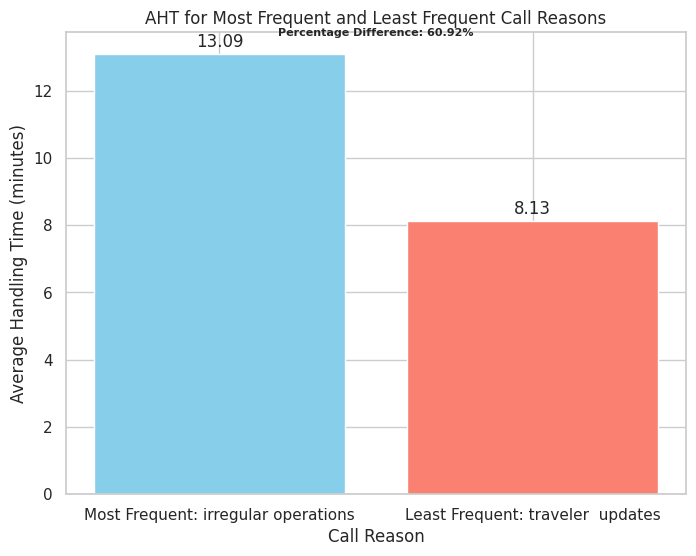

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.bar(['Most Frequent: ' + most_frequent_reason, 'Least Frequent: ' + least_frequent_reason],
        [aht_most_frequent, aht_least_frequent], color=['skyblue', 'salmon'])


plt.xlabel('Call Reason')
plt.ylabel('Average Handling Time (minutes)')
plt.title('AHT for Most Frequent and Least Frequent Call Reasons')


plt.text(0, aht_most_frequent + 0.1, f'{aht_most_frequent:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, aht_least_frequent + 0.1, f'{aht_least_frequent:.2f}', ha='center', va='bottom', fontsize=12)

percentage_annotation = f'Percentage Difference: {percentage_difference:.2f}%'
plt.text(0.5, max(aht_most_frequent, aht_least_frequent) + 0.5, percentage_annotation,
         ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()


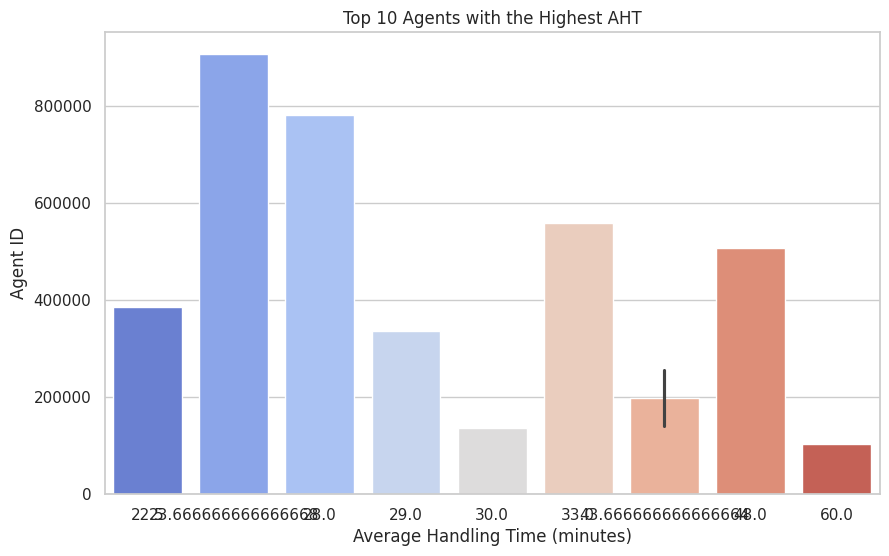

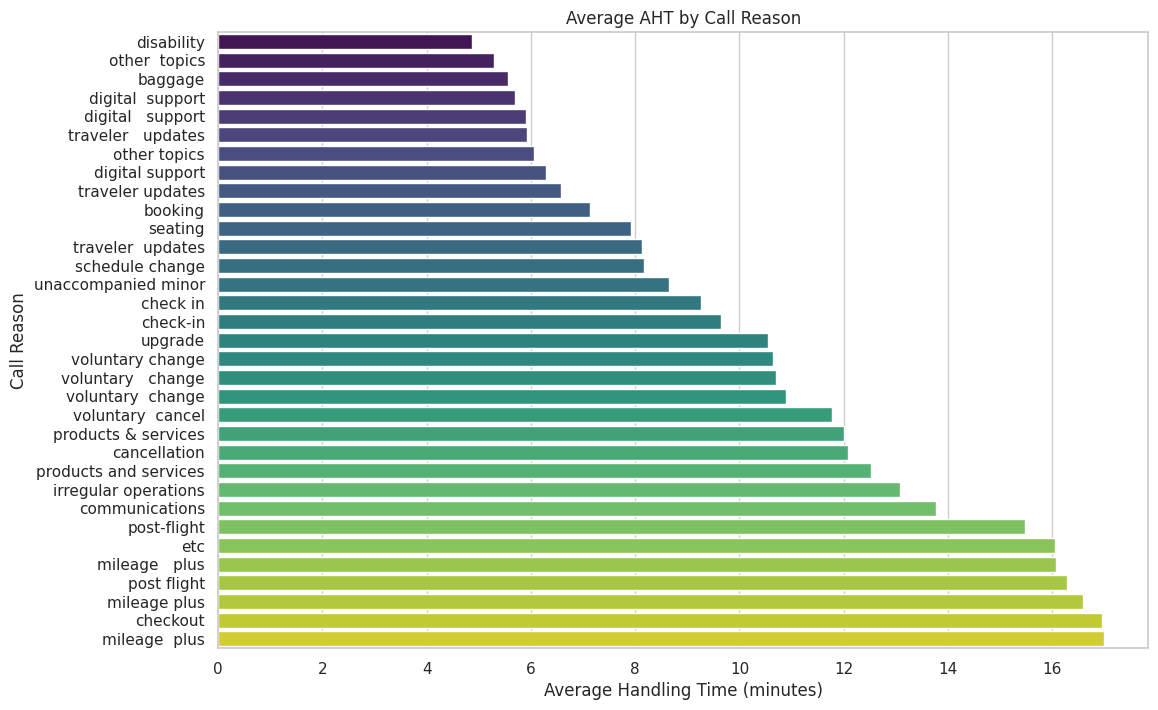

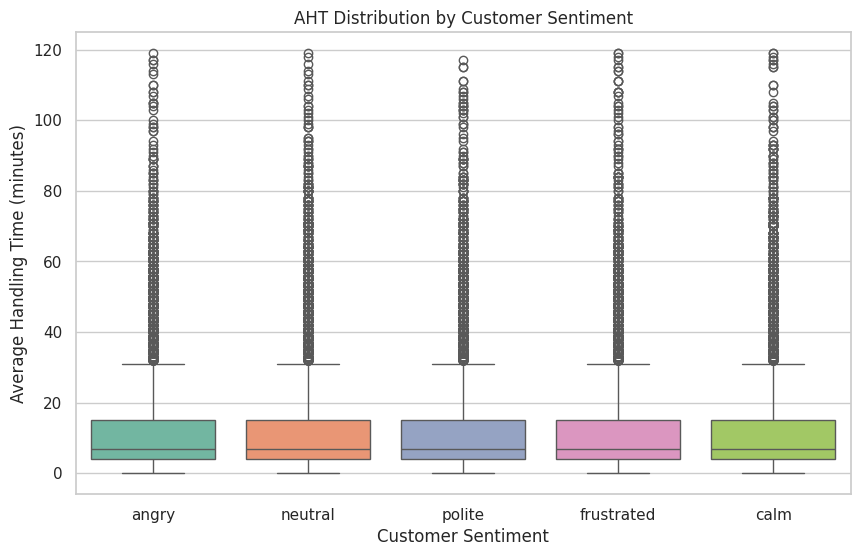

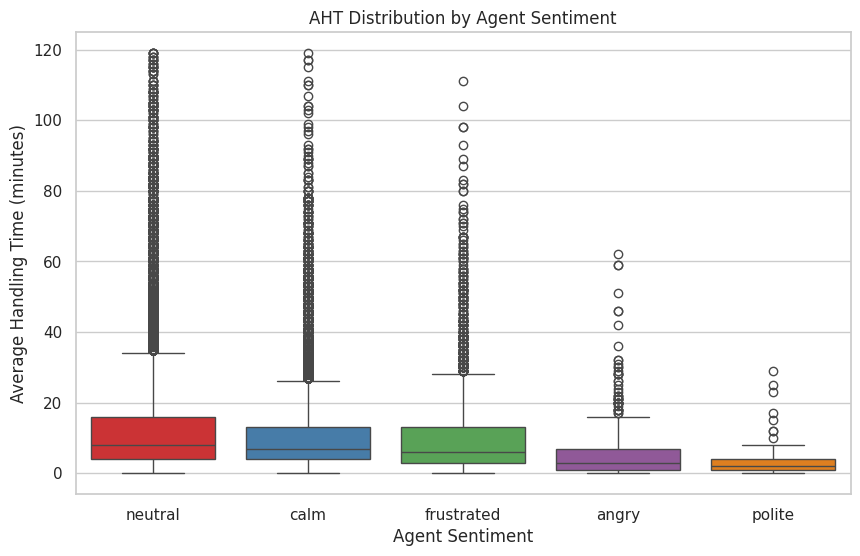

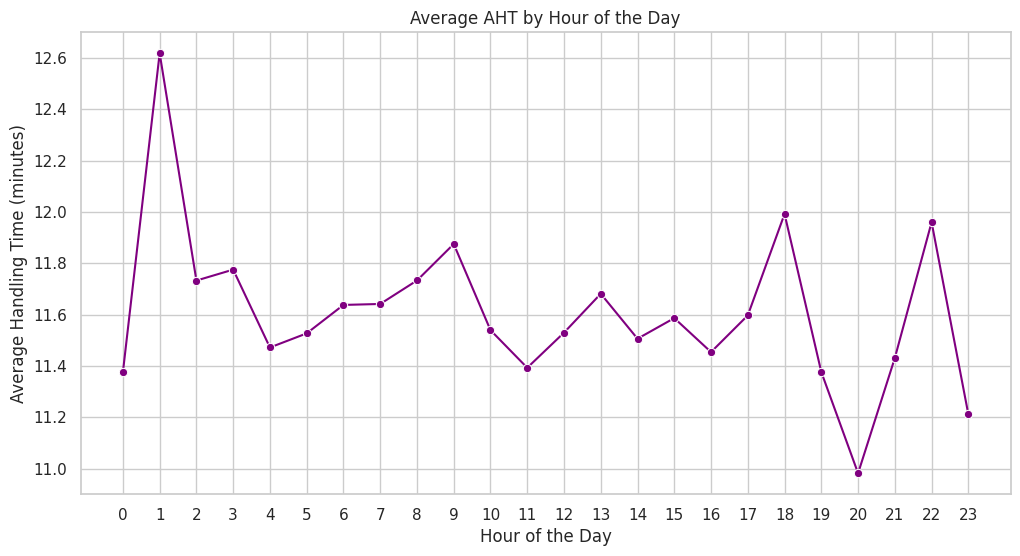

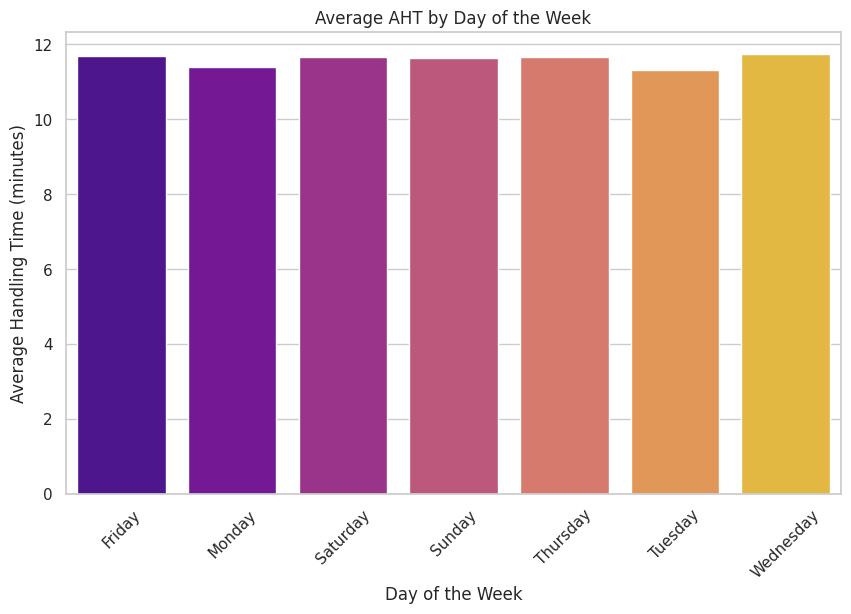

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


agent_performance = merged_data.groupby('agent_id')['AHT'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(20, 12))
sns.barplot(x=agent_performance.values, y=agent_performance.index, palette='coolwarm')
plt.xlabel('Average Handling Time (minutes)')
plt.ylabel('Agent ID')
plt.title('Top 10 Agents with the Highest AHT')
plt.show()


call_reason_aht = merged_data.groupby('primary_call_reason')['AHT'].mean().sort_values()


plt.figure(figsize=(12, 8))
sns.barplot(x=call_reason_aht.values, y=call_reason_aht.index, palette='viridis')
plt.xlabel('Average Handling Time (minutes)')
plt.ylabel('Call Reason')
plt.title('Average AHT by Call Reason')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_tone', y='AHT', data=merged_data, palette='Set2')
plt.xlabel('Customer Sentiment')
plt.ylabel('Average Handling Time (minutes)')
plt.title('AHT Distribution by Customer Sentiment')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='AHT', data=merged_data, palette='Set1')
plt.xlabel('Agent Sentiment')
plt.ylabel('Average Handling Time (minutes)')
plt.title('AHT Distribution by Agent Sentiment')
plt.show()


merged_data['call_hour'] = pd.to_datetime(merged_data['call_start_datetime']).dt.hour
merged_data['call_day'] = pd.to_datetime(merged_data['call_start_datetime']).dt.day_name()


hourly_aht = merged_data.groupby('call_hour')['AHT'].mean()


plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_aht.index, y=hourly_aht.values, marker='o', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handling Time (minutes)')
plt.title('Average AHT by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


daily_aht = merged_data.groupby('call_day')['AHT'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=daily_aht.index, y=daily_aht.values, palette='plasma')
plt.xlabel('Day of the Week')
plt.ylabel('Average Handling Time (minutes)')
plt.title('Average AHT by Day of the Week')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


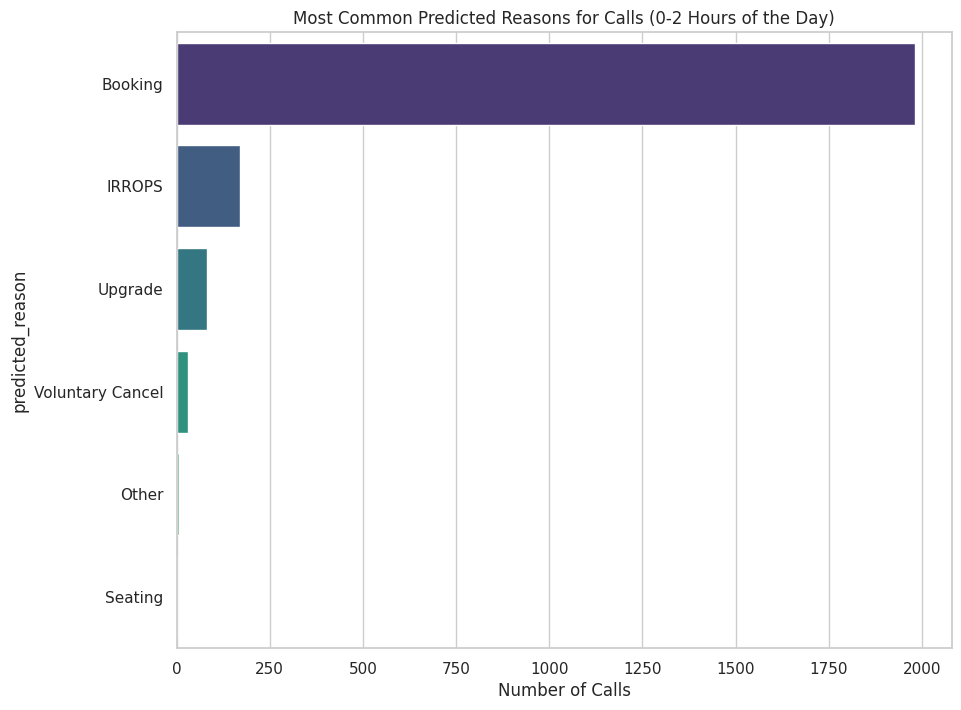

In [26]:

import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Filtering calls within 0-2 hours of the day
merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_datetime'])
merged_data_filtered = merged_data[(merged_data['call_start_datetime'].dt.hour >= 0) &
                                   (merged_data['call_start_datetime'].dt.hour < 2)]




lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return processed_tokens

merged_data_filtered['processed_transcripts'] = merged_data_filtered['call_transcript'].apply(preprocess_text)


reason_keywords = {
    'Booking': ['book', 'reservation', 'ticket'],
    'IRROPS': ['delay', 'cancellation', 'irrops'],
    'Upgrade': ['upgrade', 'class', 'seat'],
    'Seating': ['seat', 'window', 'aisle'],
    'Voluntary Cancel': ['cancel', 'refund', 'change'],

}

def predict_reason(tokens):
    for reason, keywords in reason_keywords.items():
        if any(keyword in tokens for keyword in keywords):
            return reason
    return 'Other'


merged_data_filtered['predicted_reason'] = merged_data_filtered['processed_transcripts'].apply(predict_reason)


plt.figure(figsize=(10, 8))
reason_counts = merged_data_filtered['predicted_reason'].value_counts()
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')
plt.xlabel('Number of Calls')
plt.title('Most Common Predicted Reasons for Calls (0-2 Hours of the Day)')
plt.show()




In [27]:
merged_data_filtered.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,processed_transcripts,predicted_reason
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,0.0,booking,calm,neutral,0.02,0.35,12.0,3.0,"[agent, thank, calling, united, airline, name,...",Booking
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,upgrade,neutral,frustrated,-0.20,0.20,7.0,5.0,"[agent, thank, calling, united, airline, custo...",Booking
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,seating,neutral,polite,-0.05,0.35,9.0,10.0,"[agent, thank, calling, united, airline, custo...",Booking
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,Emily Alexander,5.0,mileage plus,calm,calm,0.10,0.11,24.0,5.0,"[agent, thank, calling, united, airline, custo...",Booking
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,James Lawrence,0.0,checkout,neutral,frustrated,0.00,0.25,13.0,13.0,"[agent, thank, calling, united, airline, custo...",Booking


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [30]:
merged_data_filtered['call_transcript'][1]

"\n\nAgent: Thank you for calling United Airlines, my name is Sam, how can I help you today?\n\nCustomer: Hi Sam, yeah I'm calling because I need to change the dates on my upcoming flight. My flight is booked for next Thursday but something came up and I need to fly out on Monday instead.\n\nAgent: No problem, let me pull up your reservation so I can take a look. Can I get your last name and confirmation number please? \n\nCustomer: Sure, last name is Smith, confirmation number is ASDF456. *makes noise in background* Sorry, the kids are being loud over here. \n\nAgent: No worries, let me see... Okay Mr. Smith, I've got your reservation here for flight UA128 next Thursday. Just giving the availability a check for Monday... Umm it looks like we do have seats available on a flight leaving earlier that day. The fare would be an additional $100 each way though. How does that work for you?\n\nCustomer: Ah man, an extra $100? That's more than I was hoping to pay. Is there any way to get on th

In [31]:
merged_data_filtered['transformed_text'] = merged_data_filtered['call_transcript'].apply(transform_text)

In [32]:
merged_data_filtered.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,processed_transcripts,predicted_reason,transformed_text
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,0.0,booking,calm,neutral,0.02,0.35,12.0,3.0,"[agent, thank, calling, united, airline, name,...",Booking,agent thank call unit airlin name sam help tod...
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,upgrade,neutral,frustrated,-0.20,0.20,7.0,5.0,"[agent, thank, calling, united, airline, custo...",Booking,agent thank call unit airlin custom servic nam...
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,seating,neutral,polite,-0.05,0.35,9.0,10.0,"[agent, thank, calling, united, airline, custo...",Booking,agent thank call unit airlin custom servic nam...
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,Emily Alexander,5.0,mileage plus,calm,calm,0.10,0.11,24.0,5.0,"[agent, thank, calling, united, airline, custo...",Booking,agent thank call unit airlin custom servic nam...
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,James Lawrence,0.0,checkout,neutral,frustrated,0.00,0.25,13.0,13.0,"[agent, thank, calling, united, airline, custo...",Booking,agent thank call unit airlin custom servic nam...


In [33]:
merged_data_filtered['transformed_text'][1]

'agent thank call unit airlin name sam help today custom hi sam yeah call need chang date upcom flight flight book next thursday someth came need fli monday instead agent problem let pull reserv take look get last name confirm number pleas custom sure last name smith confirm number asdf456 make nois background sorri kid loud agent worri let see okay smith got reserv flight ua128 next thursday give avail check monday umm look like seat avail flight leav earlier day fare would addit 100 way though work custom ah man extra 100 hope pay way get flight price origin ticket money littl tight right agent understand flight chang usual incur fee unfortun let take look option hmm look like flight monday would fare increas leav quit bit later even would 9pm departur work instead origin flight custom ehh pretti late tri get earlier flight time land move return date back instead chang departur would avoid extra cost agent good think let check return date type silent second okay look like move return

In [34]:
df = merged_data_filtered[['primary_call_reason', 'transformed_text']]

df.shape



(2273, 2)

In [35]:
df.head()

,primary_call_reason,transformed_text
1,booking,agent thank call unit airlin name sam help tod...
3,upgrade,agent thank call unit airlin custom servic nam...
4,seating,agent thank call unit airlin custom servic nam...
5,mileage plus,agent thank call unit airlin custom servic nam...
6,checkout,agent thank call unit airlin custom servic nam...


In [36]:

unique_count = df['primary_call_reason'].nunique()
print(f"Number of unique values: {unique_count}")

unique_values = df['primary_call_reason'].unique()
print(f"Unique values: {unique_values}")


Number of unique values: 29
Unique values: ['booking' 'upgrade' 'seating' 'mileage   plus' 'checkout' 'irrops' nan
 'voluntary   change' 'post flight' 'check in' 'other  topics'
 'communications' 'schedule change' 'products & services'
 'voluntary  cancel' 'voluntary change' 'baggage' 'digital   support'
 'disability' 'mileage plus' 'etc' 'check-in' 'other topics'
 'products and services' 'post-flight' 'voluntary cancel'
 'traveler updates' 'digital support' 'unaccompanied minor'
 'traveler   updates']


In [51]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [56]:

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(30, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train_padded, y_train, epochs=25, batch_size=64, validation_data=(X_test_padded, y_test))


accuracy = model.evaluate(X_test_padded, y_test)[1]
print(f"Accuracy: {accuracy}")


Epoch 1/25
 5/29 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - accuracy: 0.0485 - loss: 3.3968

KeyboardInterrupt: 

In [38]:
df['primary_call_reason'] = encoder.fit_transform(df['primary_call_reason'])

In [39]:
df.head()

,primary_call_reason,transformed_text
1,1,agent thank call unit airlin name sam help tod...
3,24,agent thank call unit airlin custom servic nam...
4,20,agent thank call unit airlin custom servic nam...
5,11,agent thank call unit airlin custom servic nam...
6,4,agent thank call unit airlin custom servic nam...


In [40]:
df.duplicated().sum()

0

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

X.shape

(2273, 3000)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


gnb.fit(X_train, y_train)


y_pred1 = gnb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred1))


print("Precision (macro):", precision_score(y_test, y_pred1, average='macro'))
print("Precision (micro):", precision_score(y_test, y_pred1, average='micro'))
print("Precision (weighted):", precision_score(y_test, y_pred1, average='weighted'))


Accuracy: 0.12527472527472527
Precision (macro): 0.0267008326715164
Precision (micro): 0.12527472527472527
Precision (weighted): 0.09263257720903018


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score


X = df['transformed_text']
y = df['primary_call_reason']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)


y_pred = mnb.predict(X_test_tfidf)


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro')}")


Accuracy: 0.18461538461538463
Precision (macro): 0.009923072423072424
